In [1]:
import glob
import pandas as pd
import csv
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
directory = 'C:\ALICE Upgrade\ITSUsoftwareCMM\Stave\Marker Positions'
cp = raw_input('Enter ID of Right Cold Plate: ')
#for f in os.listdir(directory):
    #if cp in f and f.endswith('.csv'):
        #path = os.path.abspath(directory + f)
path = os.path.abspath("STAVE_MARKERPOS_2018_2_12_B-ML-Stave-0_B-HS-R-0_ALC-0312-00_026_B-HS-L-0_ALC-0312-00_120.csv")

Enter ID of Right Cold Plate: d


In [5]:
path1 = glob.glob(path)[0]

In [7]:
data = pd.read_csv(open(path), header = None, usecols = [2, 4, 5, 6])

In [9]:
label = pd.DataFrame.get(data, 2)
"""
x = pd.DataFrame.get(data, 4)
y = pd.DataFrame.get(data, 5)
z = pd.DataFrame.get(data, 6)
"""

'\nx = pd.DataFrame.get(data, 4)\ny = pd.DataFrame.get(data, 5)\nz = pd.DataFrame.get(data, 6)\n'

In [10]:
slices = data.index[label == u'MarkerCenter '].tolist()
one, two, three, four = slices[0], slices[1], slices[2], slices[3]
five, six, seven, eight = slices[4], slices[5], slices[6], slices[7]

In [33]:
mod1, mod2, mod3, mod4 = data[one+1:two-4], data[two+1:three-4], data[three+1:four-4], data[four+1:five-4]
mod5, mod6, mod7, mod8 = data[five+1:six-4], data[six+1:seven-4], data[seven+1:eight-4], data[eight+1:-4]
hs_low = [mod1, mod2, mod3, mod4]
hs_up = [mod5, mod6, mod7, mod8]
low = pd.concat([mod1, mod2, mod3, mod4])[[4, 5, 6]]
up = pd.concat([mod5, mod6, mod7, mod8])[[4, 5, 6]]

In [12]:
# z residuals
low_dz_pos = (low[low[4] > 0][6] - 13.3)*1000
low_dz_pos_y = low[low[4] > 0][5]
low_dz_neg = (low[low[4] < 0][6] - 13.3)*1000
low_dz_neg_y = low[low[4] < 0][5]
up_dz = (up[6] - 9.7)*1000
up_dz_y = up[5]

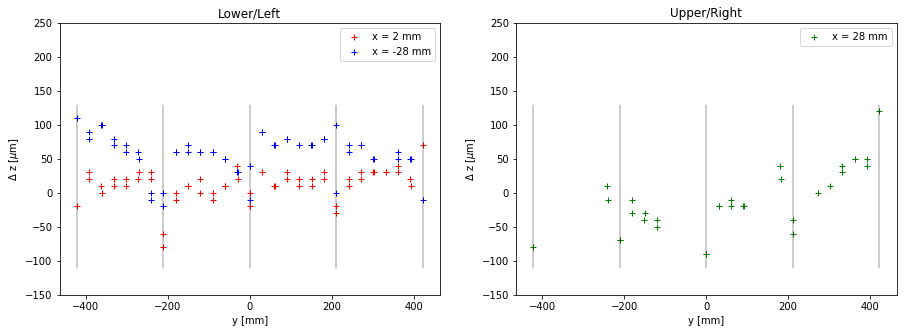

In [13]:
# z plots
dz, axes = plt.subplots(nrows=1, ncols=2, figsize = (15, 5))
zlow, zup = axes.flatten()

zlow.plot(low_dz_pos_y, low_dz_pos, 'r+', label = 'x = 2 mm')
zlow.plot(low_dz_neg_y, low_dz_neg, 'b+', label = 'x = -28 mm')
zlow.set(xlabel="y [mm]")
zlow.set(ylabel = "$\Delta$ z [$\mu$m]")
zlow.set_title('Lower/Left')
zlow.set_ylim([-150, 250])
for i in [-422, -211, 0, 211, 422]:
    zlow.axvline(x = i, ymin = .1, ymax = .7, c = 'k', linewidth = .4)
zlow.legend(loc = 1)

zup.plot(up_dz_y, up_dz, 'g+', label = 'x = 28 mm')
zup.set(xlabel="y [mm]")
zup.set(ylabel = "$\Delta$ z [$\mu$m]")
zup.set_title('Upper/Right')
zup.set_ylim([-150, 250])
for i in [-422, -211, 0, 211, 422]:
    zup.axvline(x = i, ymin = .1, ymax = .7, c = 'k', linewidth = .4)
zup.legend(loc = 1)
    
plt.show()

In [14]:
# x residuals
low_dx_pos = (low[low[4] > 0][4] - 2.099)*1000
low_dx_pos_y = low[low[4] > 0][5]
low_dx_neg = (low[low[4] < 0][4] + 27.899)*1000
low_dx_neg_y = low[low[4] < 0][5]
up_dx = (up[4] - 27.899)*1000
up_dx_y = (up[5])

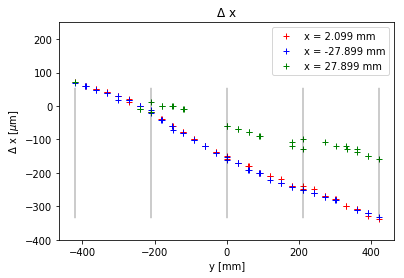

In [15]:
# x plots
plt.plot(low_dx_pos_y, low_dx_pos, 'r+', label = 'x = 2.099 mm')
plt.plot(low_dx_neg_y, low_dx_neg, 'b+', label = 'x = -27.899 mm')
plt.plot(up_dx_y, up_dx, 'g+', label = 'x = 27.899 mm')
plt.xlabel("y [mm]")
plt.ylabel("$\Delta$ x [$\mu$m]")
plt.ylim([-400, 250])
for i in [-422, -211, 0, 211, 422]:
    plt.axvline(x = i, ymin = .1, ymax = .7, c = 'k', linewidth = .4)
plt.legend(loc = 1)
plt.title("$\Delta$ x")
    
plt.show()

In [16]:
# y residuals
m1 = [-421.925, -211.375] # markers [a, b] for module 1
m2 = [-210.825, -0.275]
m3 = [0.275, 210.825]
m4 = [211.375, 421.925]

markers = np.concatenate([m1, m2, m3, m4])
Markers = np.array([m1, m2, m3, m4])

In [47]:
X, Y, Z = 4, 5, 6

def is_missing(element):
    return len(element) == 0

# replaces empty arrays resulting from points way out of tolerance with points outside the plot range
def replace(element):
    return (10000, 10000)

def prepare(markers):
    for n, i in enumerate(markers):
        if is_missing(i):
            markers[n] = replace(i)
    return markers

# low_or_up is either hs_low or hs_up
def markers(low_or_up, module, tolerance):
    number = module - 1
    mod_num = low_or_up[number]
    ad = mod_num[abs(mod_num[Y] - Markers[number][0]) < tolerance]
    bc = mod_num[abs(mod_num[Y] - Markers[number][1]) < tolerance]
    if low_or_up == hs_low:
        a = ad[ad[X] > 0][Y]
        d = ad[ad[X] < 0][Y]
        b = bc[bc[X] > 0][Y]
        c = bc[bc[X] < 0][Y]
        markers = [a, d, b, c]
    else:
        a = ad[Y]
        b = bc[Y]
        markers = [a, b]
    return prepare(markers)

low_ADBC = [low_mark(i, 0.4) for i in range(1, 5)]
up_AB = [up_mark(i, 0.8) for i in range(1, 5)]

In [51]:
a_i, b_i, c_i, d_i = 0, 2, 3, 1
#low_ab = [low_ABCD[i][a_i], low_ABCD[i][b_i] for i in low_ABCD]
# select A, B in low_ABCD
low_ADBC

TypeError: list indices must be integers, not list

In [49]:
up_AB

[[130   -421.27
  Name: 5, dtype: float64, 133   -210.72
  Name: 5, dtype: float64], [139   -210.18
  Name: 5, dtype: float64, 146    0.37
  Name: 5, dtype: float64], [152    0.88
  Name: 5, dtype: float64, 161    211.43
  Name: 5, dtype: float64], [167    211.98
  Name: 5, dtype: float64, 176    422.53
  Name: 5, dtype: float64]]

In [24]:
#low_ab = np.array([float(i) for i in [ones_a, Ones_b, twos_a, Twos_b, threes_a, Threes_b, fours_a, Fours_b]])
#low_dc = np.array([float(i) for i in [ones_d, Ones_c, twos_d, Twos_c, threes_d, Threes_c, fours_d, Fours_c]])
#up_ab = np.array([float(i) for i in [five_a, five_b, six_a, six_b, seven_a, seven_b, eight_a, eight_b]])

NameError: name 'ones_a' is not defined

In [196]:
plt.plot(markers, (low_ab - markers)*1000, 'r+', label = "x = 2.099 mm")
plt.plot(markers, (low_dc - markers)*1000, 'b+', label = "x = -27.899 mm")
plt.plot(markers, (up_ab - markers)*1000, 'g+', label = "x = 27.899 mm")
for i in [-422, -211, 0, 211, 422]:
    plt.axvline(x = i, ymin = 0, ymax = 1, c = 'k', linewidth = .4)
plt.title("$\Delta$ y")
plt.xlabel("y [mm]")
plt.ylabel("$\Delta$ y [$\mu$m]")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

KeyError: 0

In [40]:
"""
def low_mark(module, tolerance):
    number = module - 1
    mod_num = hs_low[number]
    ad = mod_num[abs(mod_num[Y] - Markers[number][0]) < tolerance]
    a = ad[ad[X] > 0][Y]
    d = ad[ad[X] < 0][Y]
    bc = mod_num[abs(mod_num[Y] - Markers[number][1]) < tolerance]
    b = bc[bc[X] > 0][Y]
    c = bc[bc[X] < 0][Y]
    markers = [a, d, b, c]
    return prepare(markers)

def up_mark(module, tolerance):
    number = module - 1
    mod_num = hs_up[number]
    a = mod_num[abs(mod_num[Y] - Markers[number][0]) < tolerance][Y]
    b = mod_num[abs(mod_num[Y] - Markers[number][1]) < tolerance][Y]
    markers = [a, b]
    return prepare(markers)
"""

True